# Hochschule Bonn-Rhein-Sieg
### Scientific Experimentation and Evaluation, SS18
### youBot placing experiment

submitted by: `Abhishek Padalkar, Max Mensing, Pranjal Dhole`

## Packages

In [1]:
import numpy as np
import os
from scipy import stats

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sb

%matplotlib inline

## Importing data

### Initial pose
This pose is given in the SEE User Manual.

In [21]:
initial_pose = np.array([-79.27, -99.87, -1.62])
target_straight = np.array([-79.40, -87.48, -1.72])
target_left = np.array([-109.65, -102.75, -2.10])
target_right = np.array([-41.73, -88.63, -0.92])

### Fetching collected data from CSV to a dictionary

In [22]:
def get_filepath(filename: str):
    PATH = os.getcwd()
    return PATH+'/recordings/CSVs/'+filename+'.csv'

def fetch_data_from_csv(filename: str):
    return np.loadtxt(get_filepath(filename), delimiter=',')

In [23]:
def distribution_plot(load: str, motion: str, db: dict, save=False, show_fig=True):
    fname = load+'_'+motion
    d = db[fname]
    distr = sb.jointplot(d[:,0], d[:,1], kind='kde')
    distr.set_axis_labels(xlabel='distance x (cm)', ylabel='distance y (cm)')
    if save:
        plt.savefig('images/'+fname)
    if show_fig:
        plt.show()
    plt.close()

In [24]:
def collect_data(load: str, move: str, generate_plots=False):
    data = {}
    for i in load:
        for j in move:
            filename = i+'_'+j
            data[filename] = fetch_data_from_csv(filename)
            if generate_plots:
                distribution_plot(load=i, motion=j, db=data, save=True, show_fig=False)
    return data

In [25]:
load = ['small', 'medium', 'big']
move = ['left', 'right', 'straight']

In [26]:
data = collect_data(load, move, generate_plots=True)

## Visualizing poses

In [44]:
def plot_data(left, right, straight, initial,\
              target_left, target_right, target_straight,\
              zoom_size=8, zoom_xylim=5, load_type: str, save_fig=False):
    lx, ly, lt = left[:, 0], left[:, 1], left[:, 2]
    rx, ry, rt = right[:, 0], right[:, 1], right[:, 2]
    sx, sy, st = straight[:, 0], straight[:, 1], straight[:, 2]
    ix, iy, it = initial[0], initial[1], initial[2]
    ix_left, iy_left, it_left = target_left[0], target_left[1], target_left[2]

    lx_mean = lx.mean(); ly_mean = ly.mean(); lt_mean = lt.mean()
    rx_mean = rx.mean(); ry_mean = ry.mean(); rt_mean = rt.mean()
    sx_mean = sx.mean(); sy_mean = sy.mean(); st_mean = st.mean()

    # fig, ax = plt.subplots()
    fig = plt.figure(figsize=(10, 10))
    ax = plt.gca()
    
    left_motion = ax.scatter(lx, ly, c='r', label=('left motion'.format(load_type)))
    right_motion = ax.scatter(rx, ry, c='b', label=('right motion'.format(load_type)))
    straight_motion = ax.scatter(sx, sy, c='g', label=('straight motion'.format(load_type)))
    
    left_mean = ax.scatter(lx_mean, ly_mean, c='k', marker='x',
                           label=('left motion mean value'.format(load_type)))
    right_mean = ax.scatter(rx_mean, ry_mean, c='k', marker='x',
                            label=('right motion mean value'.format(load_type)))
    straight_mean = ax.scatter(sx_mean, sy_mean, c='k', marker='x',
                               label=('straight motion mean value'.format(load_type)))
    initial = ax.scatter(ix, iy, c='k', label=('Initial pose'.format(load_type)))
    t_left = ax.scatter(ix_left, iy_left, c='k', marker='+',\
                        label=('Target left pose'.format(load_type)))
    t_right = ax.scatter(target_right[0], target_right[1], c='k', marker='+',\
                         label=('Target right pose'.format(load_type)))
    t_straight = ax.scatter(target_straight[0], target_straight[1], c='k', marker='+',\
                            label=('Target straight pose'.format(load_type)))
    
    # Setup of zoom-in figure and legend position
    ax.legend(loc=1)
    
    axin_l = zoomed_inset_axes(ax, zoom_size, loc=3)
    mark_inset(ax, axin_l, loc1=1, loc2=2, fc="none", ec="0.5")
    
    axin_r = zoomed_inset_axes(ax, zoom_size, loc=4)
    mark_inset(ax, axin_r, loc1=1, loc2=2, fc="none", ec="0.5")
    
    axin_s = zoomed_inset_axes(ax, zoom_size, loc=8)
    mark_inset(ax, axin_s, loc1=1, loc2=2, fc="none", ec="0.5")

    # Plot into zoom-in figures
    axin_l.scatter(lx, ly, c='r', label=('left wheel'.format(load_type)))
    axin_l.scatter(lx_mean, ly_mean, c='k', marker='x',label=('left zoomed'.format(load_type)))
    axin_l.set_xlim(lx_mean-5, lx_mean+8)
    axin_l.set_ylim(ly_mean-8, ly_mean+8)
    axin_l.grid(color='b', linestyle='-', linewidth=.1)

    axin_r.scatter(rx, ry, c='b', label=('right wheel'.format(load_type)))
    axin_r.scatter(rx_mean, ry_mean, c='k', marker='x',
                   label=('right motion mean value'.format(load_type)))
    axin_r.set_xlim(rx_mean-3, rx_mean+3)
    axin_r.set_ylim(ry_mean-3, ry_mean+3)
    axin_r.grid(color='b', linestyle='-', linewidth=.1)

    axin_s.scatter(sx, sy, c='g', label=('left wheel'.format(load_type)))
    axin_s.scatter(sx_mean, sy_mean, c='k', marker='x',
                   label=('straight motion mean value'.format(load_type)))
    axin_s.set_xlim(sx_mean-3, sx_mean+3)
    axin_s.set_ylim(sy_mean-3, sy_mean+3)
    axin_s.grid(color='b', linestyle='-', linewidth=.1)
    
    # Labels
    title = load_type+' load placement Experiment'
    ax.set_title(title)
    ax.set_xlabel('distance x (cm)')
    ax.set_ylabel('distance y (cm)')
    
    # Figure aspects 
    ax.set_aspect('equal')
    ax.set_xlim(-200, 0)
    ax.set_ylim(-200, 0)
    ax.grid(color='b', linestyle='-', linewidth=.1)
    
    if save_fig:
        fig.savefig('images/'+load_type)

    plt.show()
    plt.close()

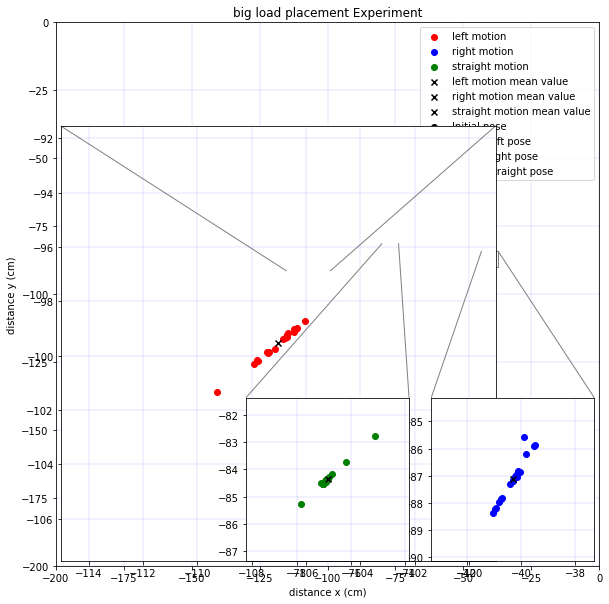

In [45]:
plot_data(data['big_left'], data['big_right'], data['big_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='big', save_fig=True)

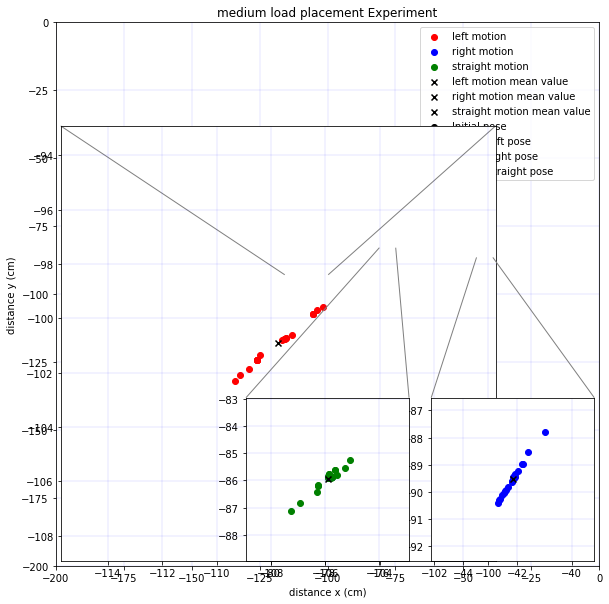

In [46]:
plot_data(data['medium_left'], data['medium_right'], data['medium_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='medium', save_fig=True)

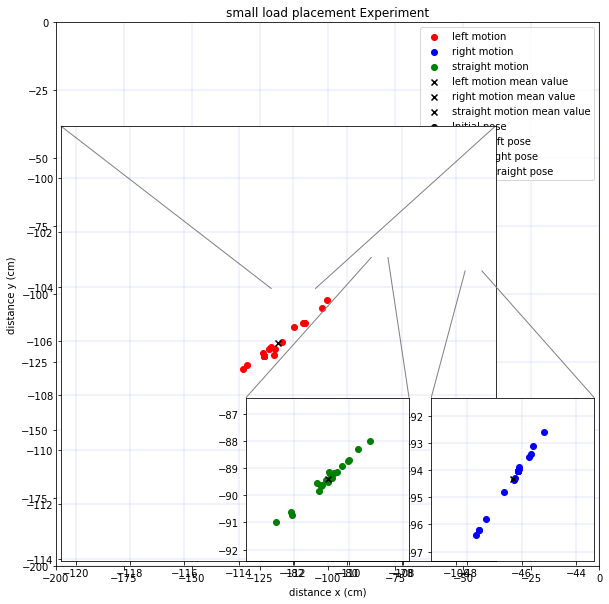

In [47]:
plot_data(data['small_left'], data['small_right'], data['small_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='small', save_fig=True)